# Modifying and customizing charts

The charts produced by `modelflow` methods like `keep_plot()` or `.plot()` are perfectly serviceable but out-of-the-box are not necessarily of high-enough quality to serve in publications or reports.  Fortunately these outputs are themselves modifiable.  They can be revised to make more compelling charts and saved in a wide variety of formats suitable to include in on-line or print publications.

The plots produced by `modelflow` are actually generated by the `matplotlib` package all of whose functionality is inherited by `modelflow` and is used below to modify the standard graphs coming from `modelflow`.  

Note this chapter touches on only a few of `matplotlib`s capabilities. Much more can be found in the documentation for this versatile package, which can be found [here](https://matplotlib.org/stable/index.html).

## Initialize the workspace



In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

In [2]:
from modelclass import model 
model.widescreen()
model.scroll_off()

In [3]:
from IPython.display import display, Markdown, HTML
from pathlib import Path 
import glob

In [4]:
# Used when developing  
%load_ext autoreload
%autoreload 2

## Load the pre-existing model mpak, including its data and results from earlier simulations

The file `pak_CarbonTaxSims.pcim` saved earlier includes the Pakistan model, all of its equations, original data and the results of the carbon tax simulations conducted in Chapter xx. Indeed all of the objects created in that earlier python session were stored in the `.pcim` file and after it is loaded can be accessed in this python session.

In [5]:
mpak,exostart = model.modelload('../models/pak scenarios.pcim',run=1,silent=1)

file read:  C:\mflow\modelflow-manual\papers\mfbook\content\models\pak scenarios.pcim


The `.keep_solutions.keys()` method can be used to print out a list of all the scenarios produced in that earlier session and stored with the `.keep()` method.

In [6]:
for sol in mpak.keep_solutions.keys():
    print(sol)

Baseline
Coal, Oil and Gastax : 5 nominal
Coal, Oil and Gastax : 10 nominal
Coal, Oil and Gastax : 15 nominal
Coal, Oil and Gastax : 20 nominal
Coal, Oil and Gastax : 25 nominal


Because all of these scenarios were stores in the `pcim` file their results can be re-inspected using the `.keep_plot()` method without having to re-run the simulations.  Below a comparison of the level of GDP and Carbon Emissions in each scenario expressed as a percent of the same variable's level in the baseline scenario. 



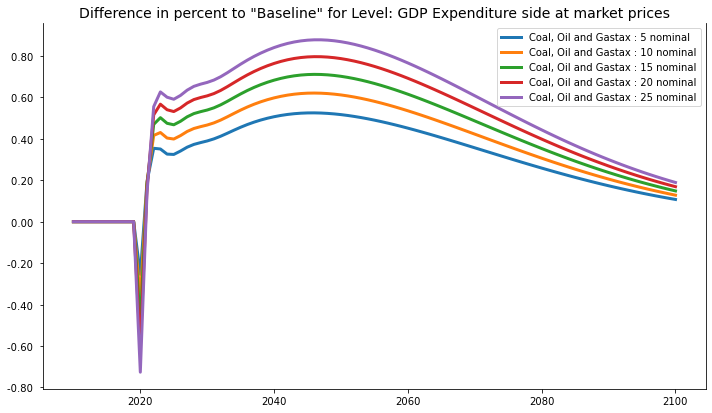

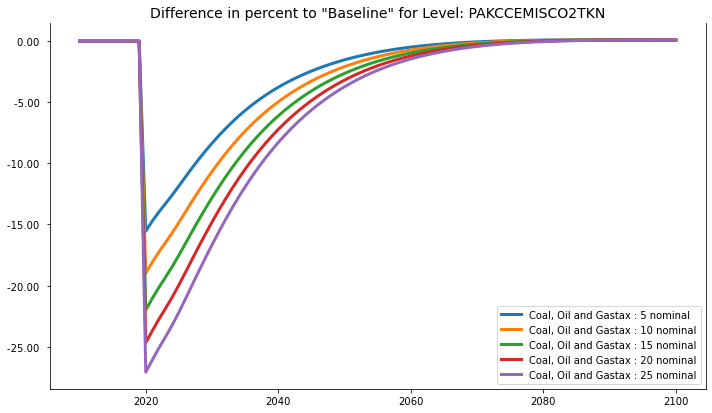

In [7]:
plot_level  = mpak.keep_plot('PAKNYGDPMKTPKN PAKCCEMISCO2TKN',2010,2100,diffpct=1,legend=1);

The `.make_plot()` method returns a dictionary containing the matplotlib representation of each plot generated.  In the above example this dictionary (comprised of a key with the name of the variable displayed and a value comprised of the `matplotlib` figure generated by the command) was assigned to the variable `plot_level`, whose contents is shown below.




In [8]:
plot_level

{'PAKNYGDPMKTPKN': <Figure size 720x432 with 1 Axes>,
 'PAKCCEMISCO2TKN': <Figure size 720x432 with 1 Axes>}

Because the `plot_level` dictionary contains the `matplotlib` figure, they can be re-displayed directly from the dictionary by cycling through it and displaying the figure.

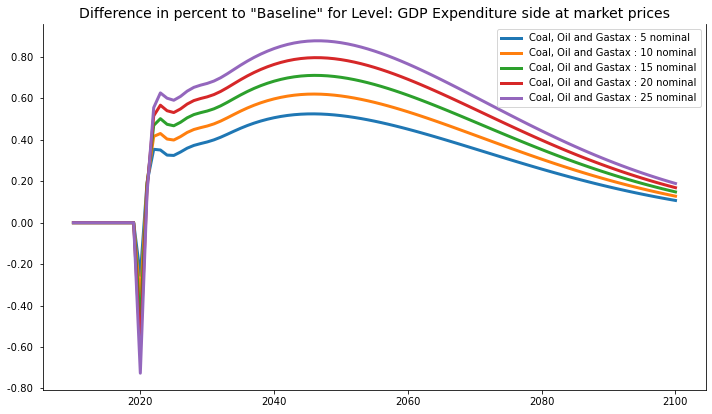

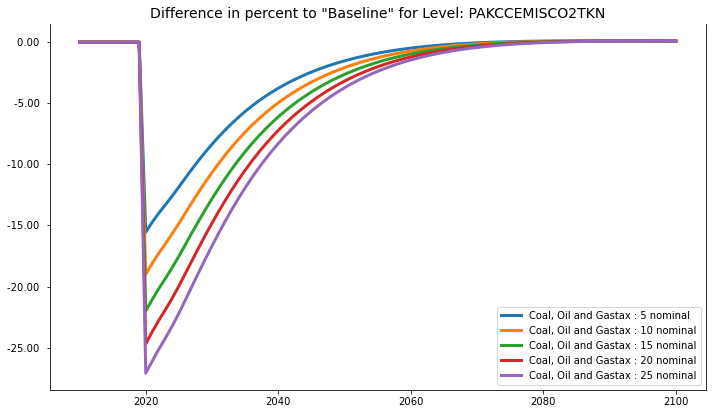

In [9]:
for v,p in plot_level.items():
    display(p)
    

or one specific figure can be directly referenced and displayed and the output assigned to another variable (`fig` in this instance).

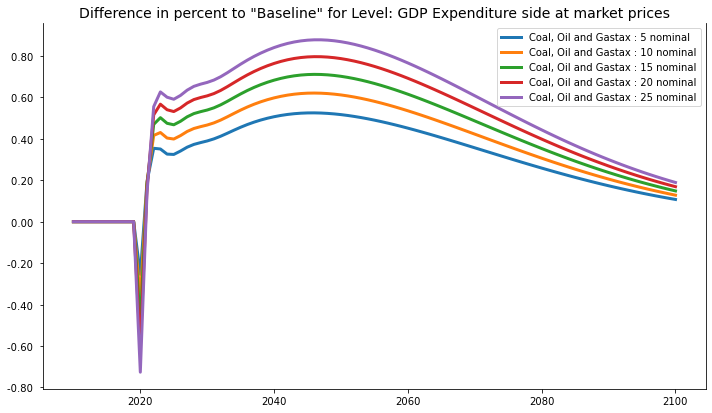

In [10]:
fig=plot_level['PAKNYGDPMKTPKN']
fig

## Customizing the plot

The figure cam then be modified using matplotlib routines, By changing the title, and adding axes labels for example.

In [11]:
help(fig)

Help on Figure in module matplotlib.figure object:

class Figure(FigureBase)
 |  Figure(figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None, *, layout=None, **kwargs)
 |  
 |  The top level container for all the plot elements.
 |  
 |  The Figure instance supports callbacks through a *callbacks* attribute
 |  which is a `.CallbackRegistry` instance.  The events you can connect to
 |  are 'dpi_changed', and the callback will be called with ``func(fig)`` where
 |  fig is the `Figure` instance.
 |  
 |  Attributes
 |  ----------
 |  patch
 |      The `.Rectangle` instance representing the figure background patch.
 |  
 |  suppressComposite
 |      For multiple images, the figure will make composite images
 |      depending on the renderer option_image_nocomposite function.  If
 |      *suppressComposite* is a boolean, this will override the renderer.
 |  
 |  Method resolution order:
 |      Figu

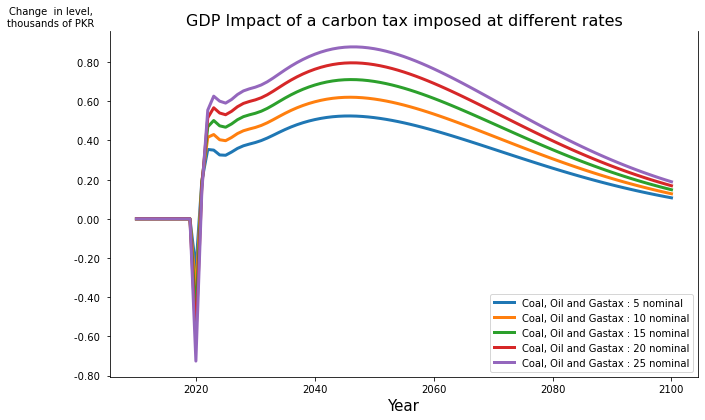

In [12]:
fig.axes[0].set_title('GDP Impact of a carbon tax imposed at different rates',fontsize=16)
fig.axes[0].set_xlabel('Year')
fig.axes[0].set_ylabel('Change  in level,\nthousands of PKR',fontsize=10)
fig.axes[0].yaxis.set_label_coords(-0.1,1.02)

fig


## Charts can be saved in several formats
This is done by using the savefig option. 
The location, prefix name and format is taken from the string. 

:::{Admonition} IB
This does not seem tio work

:::

In [15]:
fig.savefig='Level.svg' 
fig.savefig='Level.png'
fig.savefig='Level.jpg'
fig.savefig='Level.pdf'

## Multiple charts

The `.keep_plot_multi()` method allows many variables to be plotted on separate charts, which are then grouped in a grid.

The command
```
mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1,
                                size=(10,5) ,title=''  );
```
draws two graphs of five variables each with the results from the `basedf` `DataFrame` in one and the `latestdf` in the other.


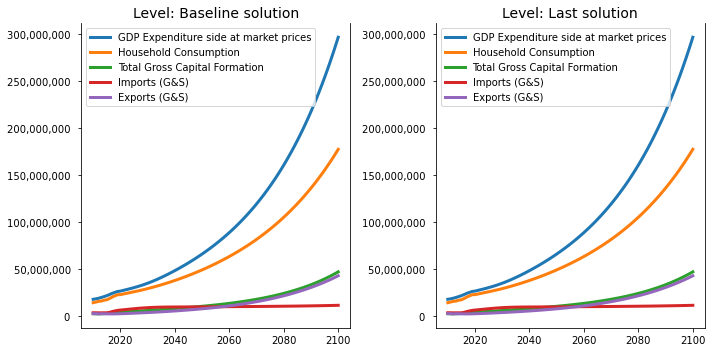

In [16]:
with mpak.keepswitch(True):
    var_figs = mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1,
                                size=(10,5) ,title=''  );



## The `.keep_switch` method 

The `.keep_switch` method allows the user to select a subset of the conserved scenarios. In the example below all scenarios that contain the string 25 or 15 are plotted.

 

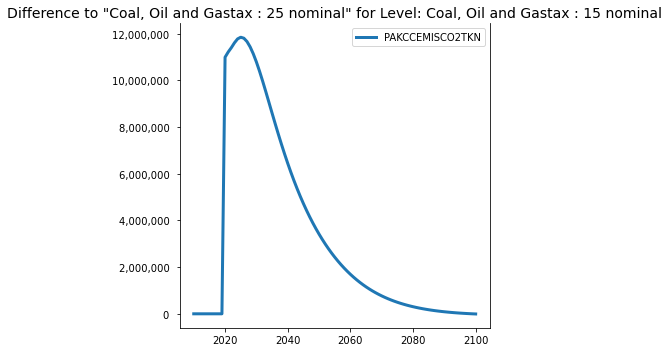

In [22]:
with mpak.keepswitch(scenarios = '*25* *15*'):
   graphs=mpak.keep_plot_multi('PAKCCEMISCO2TKN',2010,2100,diff=1,keep_dim=0,legend=1,
                                size=(10,5) ,title='')

# show results as a difference compared with the baseline

Here we no longer restrict the scenarios being presented.


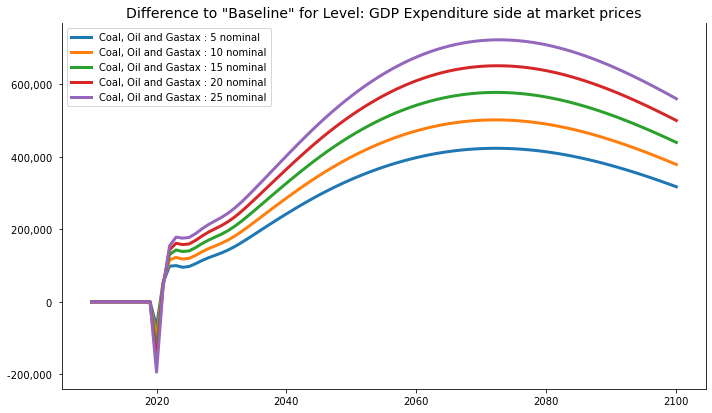

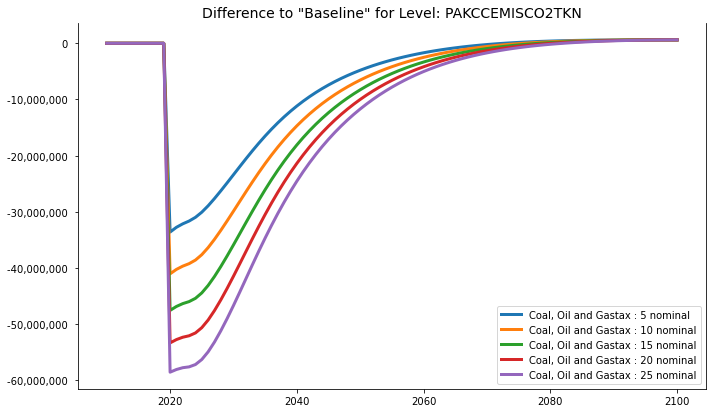

In [23]:
figs = mpak.keep_plot('PAKNYGDPMKTPKN PAKCCEMISCO2TKN',2010,2100,legend=1,diff=1);

In this example, different scenarios are shown on separate graphs. `dim=0` indicates to vary the keep across figures, while the selector `'last*'` indicates that we just want to look at the lastdf scenario.



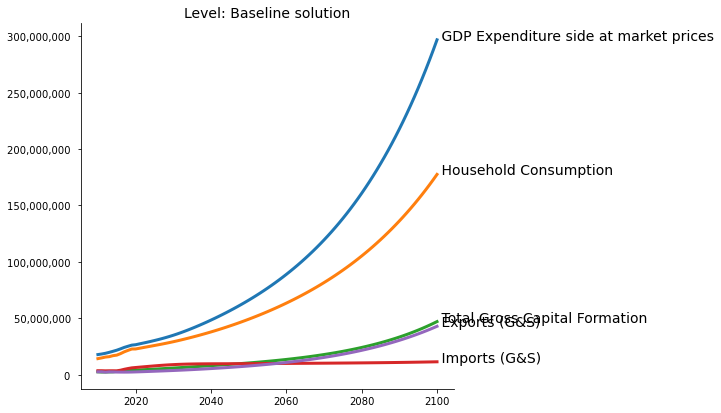

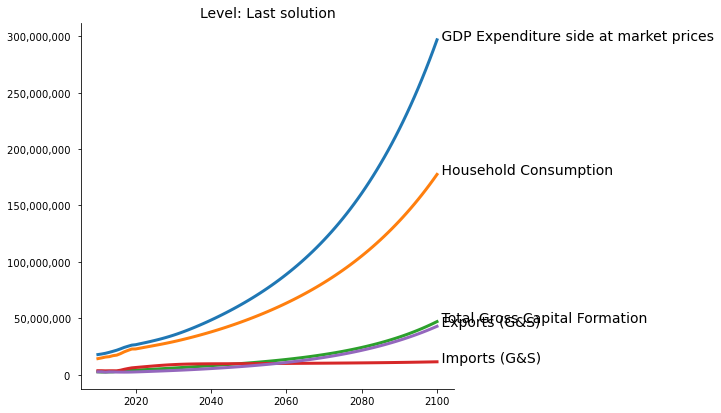

In [38]:
with mpak.keepswitch(True,scenarios='*omin*'):
    var_figs = mpak.keep_plot('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN'
                              ,2010,2100,keep_dim=0,legend=0);

## or use the keep_plot_multi where all charts are collected in one fig

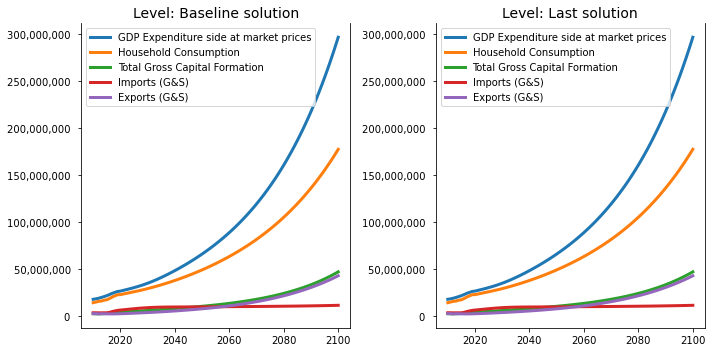

In [34]:
with mpak.keepswitch(True):
    var_figs = mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1
                                ,size=(10,5) ,title=''  );

## Change titles for each axes

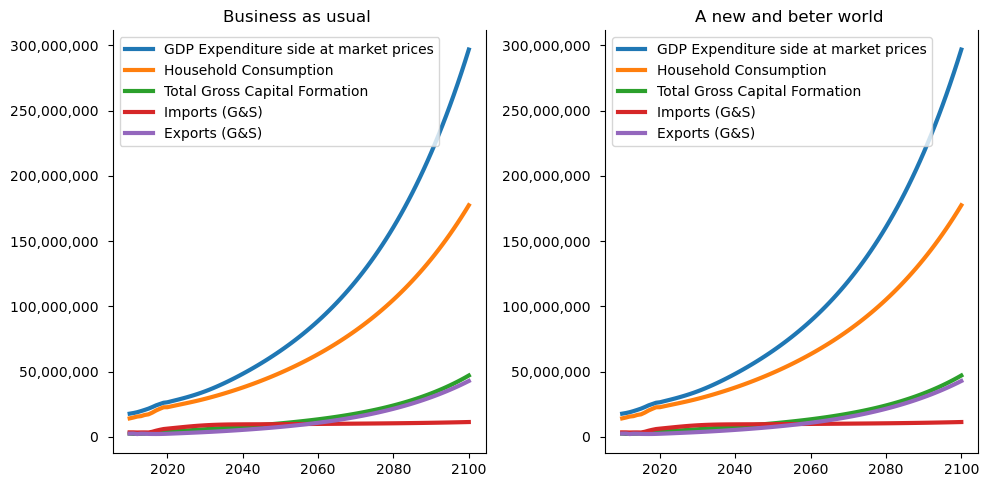

In [18]:
with mpak.keepswitch(True):
    var_figs = mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1,
                                size=(10,5) ,title=''  );
var_figs.axes[0].set_title('Business as usual ');    # many properties can be set afterward 
var_figs.axes[1].set_title('A new and beter world ');

## Add text to the axes

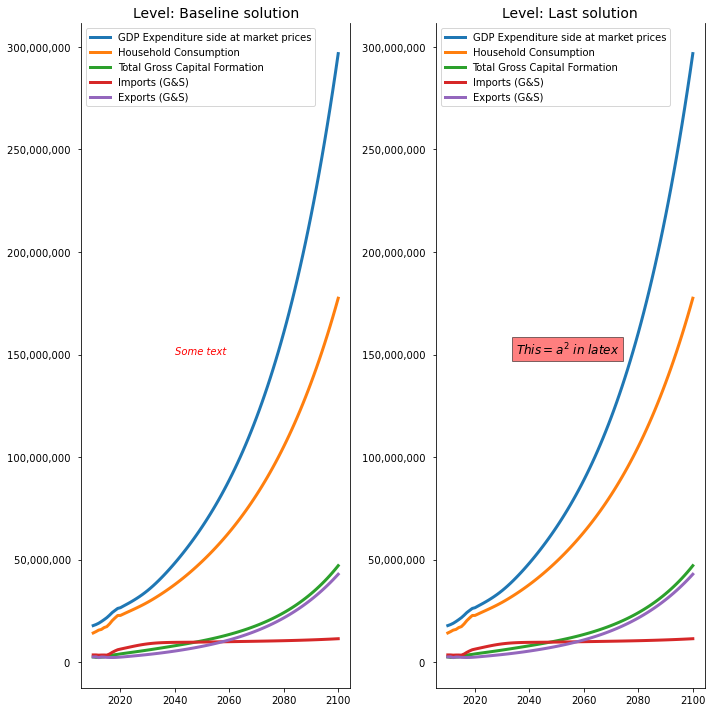

In [36]:
with mpak.keepswitch(True):
    var_figs = mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1)

var_figs.axes[0].text(2040.,150_000_000., 'Some text', style='italic',color='red');

var_figs.axes[1].text(2035,150_000_000, '$This = a^2$ in latex', style='italic', fontsize=12,
        bbox=dict(facecolor='red', alpha=0.5));


## Charts can be resized afterward 

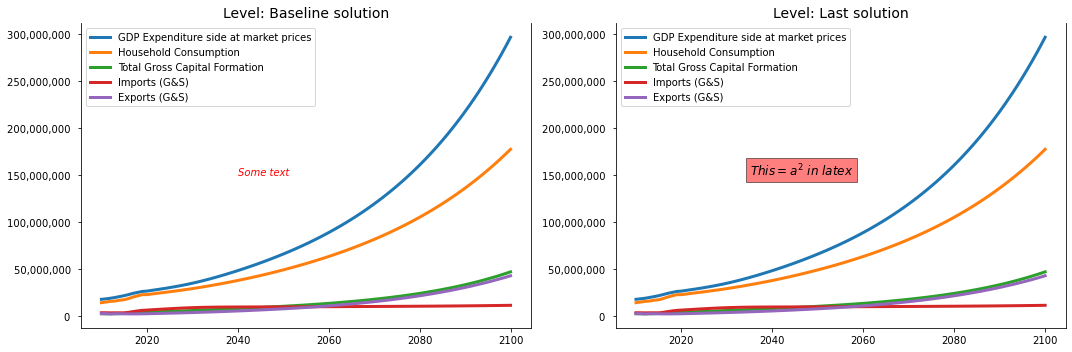

In [37]:
var_figs.set_size_inches(15,5)
var_figs

## charts can be removed 

In [21]:
var_figs.axes[1].remove()

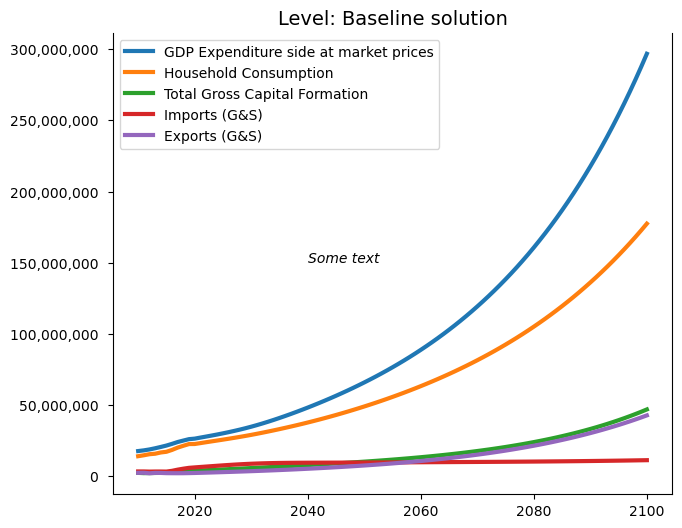

In [22]:
var_figs.set_size_inches(15,5)
var_figs